In [1]:
import requests
from PIL import Image

In [2]:
subscription_key = '8387f9c474574ec394896ce7dd891f45'

In [3]:
assert subscription_key

In [4]:
face_api_url= 'https://20210731tsukasa.cognitiveservices.azure.com/face/v1.0/detect'

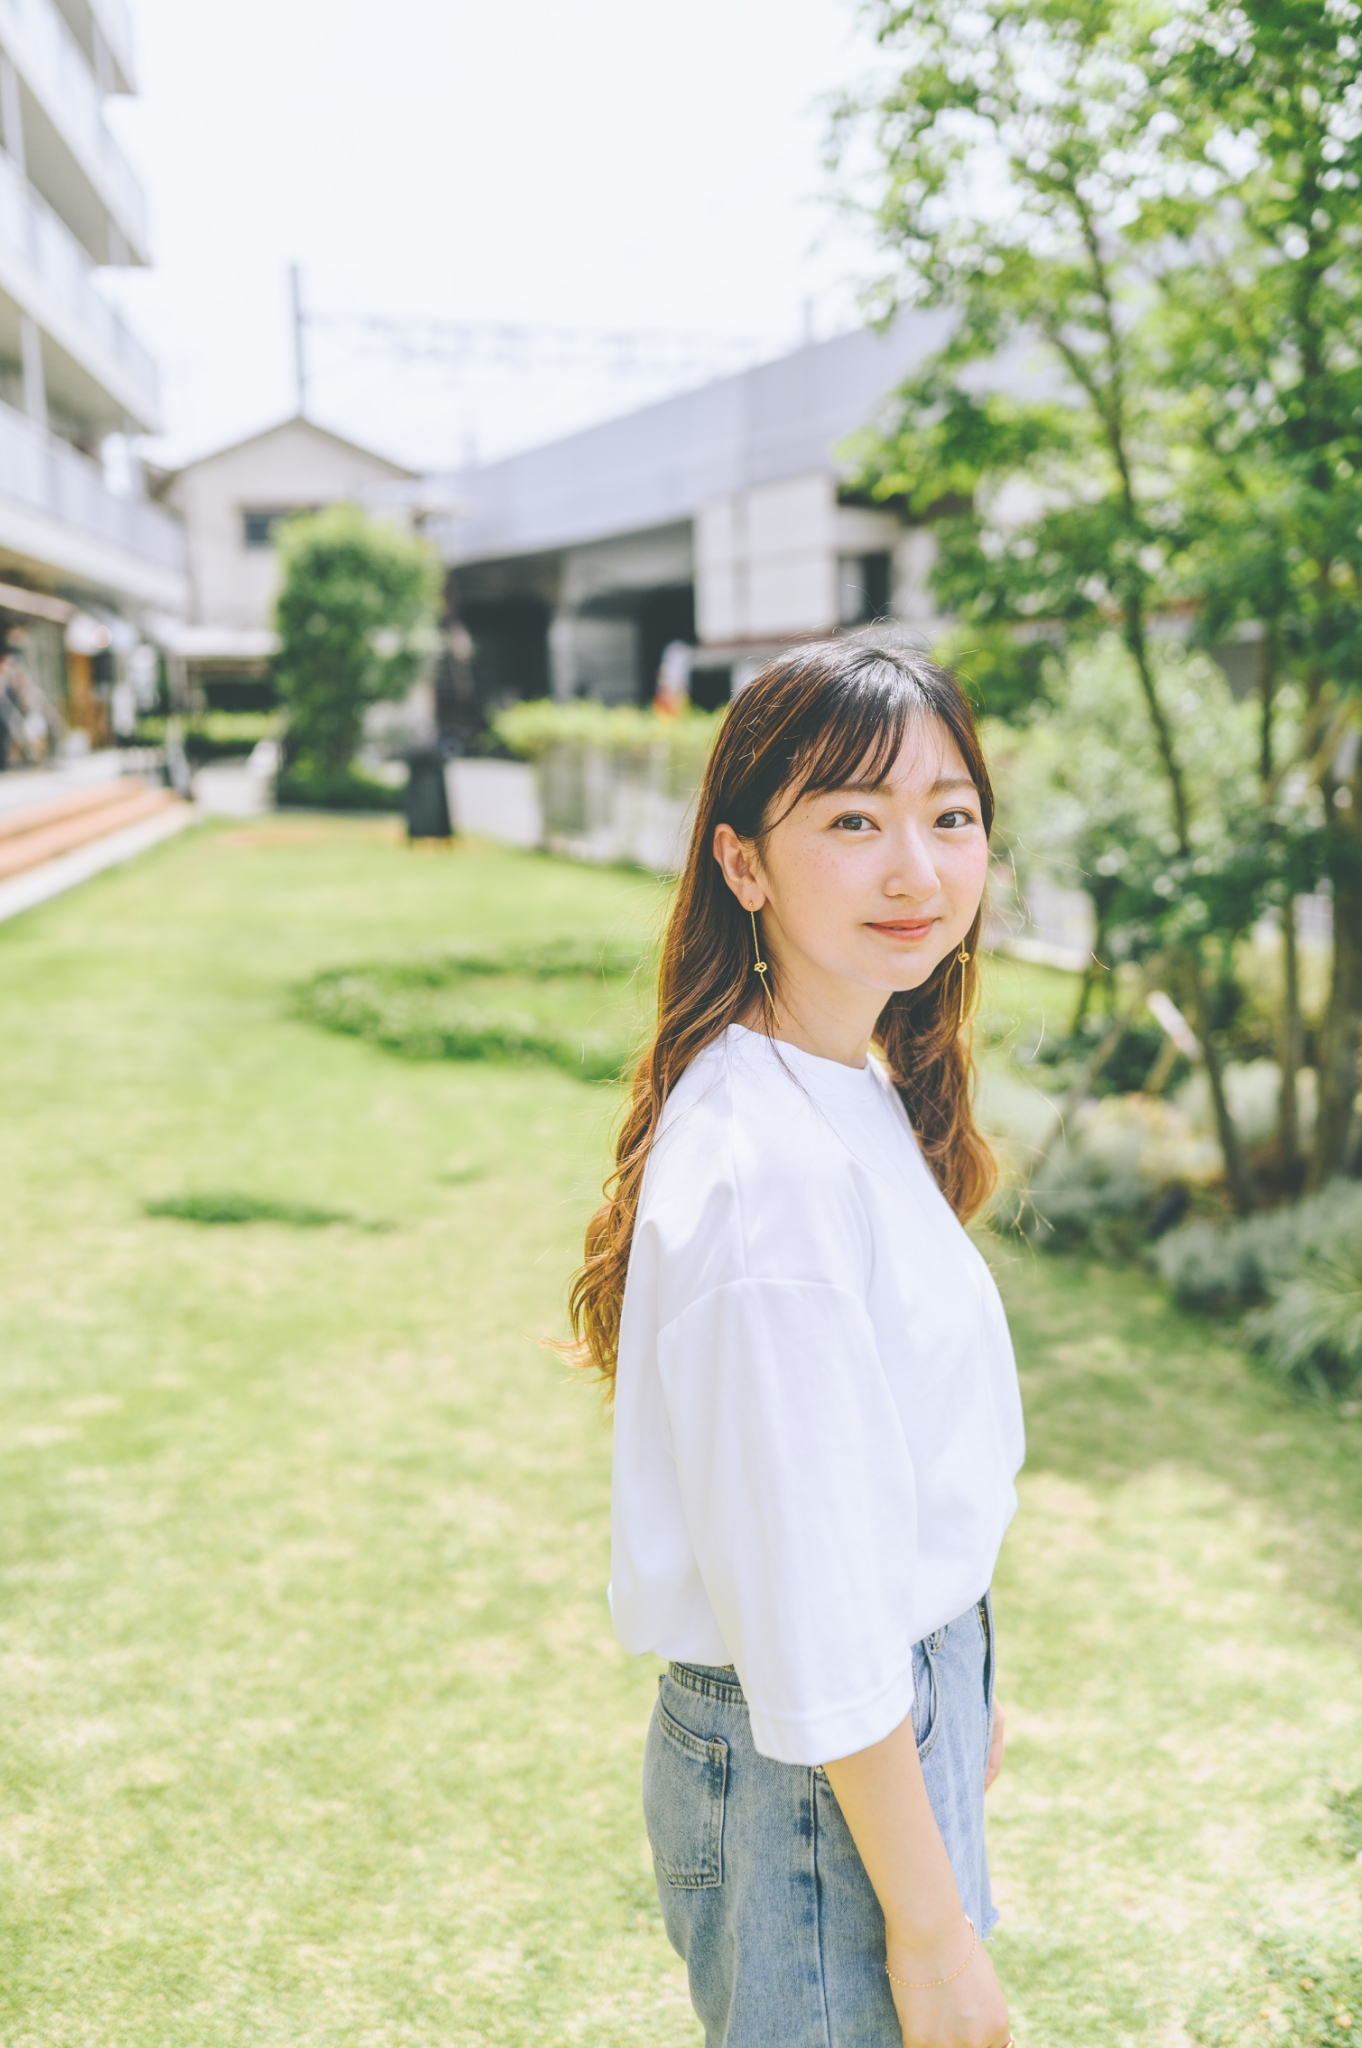

In [6]:
img = Image.open('imade.jpg')
img

In [7]:
with open('imade.jpg', 'rb') as f:
    binary_img = f.read()

In [9]:
#binary_img

In [14]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key':subscription_key
}

    
params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise' 
}
  
res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [15]:
res

<Response [200]>

In [17]:
result = res.json()
result

[{'faceId': 'b52513a2-1e17-4c12-898f-aa2990810224',
  'faceRectangle': {'top': 764, 'left': 797, 'width': 217, 'height': 217},
  'faceAttributes': {'smile': 0.942,
   'headPose': {'pitch': -5.4, 'roll': -5.5, 'yaw': 21.8},
   'gender': 'female',
   'age': 21.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.942,
    'neutral': 0.057,
    'sadness': 0.0,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.09},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.64},
   'noise': {'noiseLevel': 'low', 'value': 0.04},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.08,
    'invisible': False,
    'hairColor': [{'color': 'black', 'confidence': 1.0},
     {'color': 'brown',

In [19]:
rect = result[0]['faceRectangle']
rect

{'top': 764, 'left': 797, 'width': 217, 'height': 217}

In [20]:
from PIL import ImageDraw

In [21]:
draw = ImageDraw.Draw(img)

In [22]:
rect

{'top': 764, 'left': 797, 'width': 217, 'height': 217}

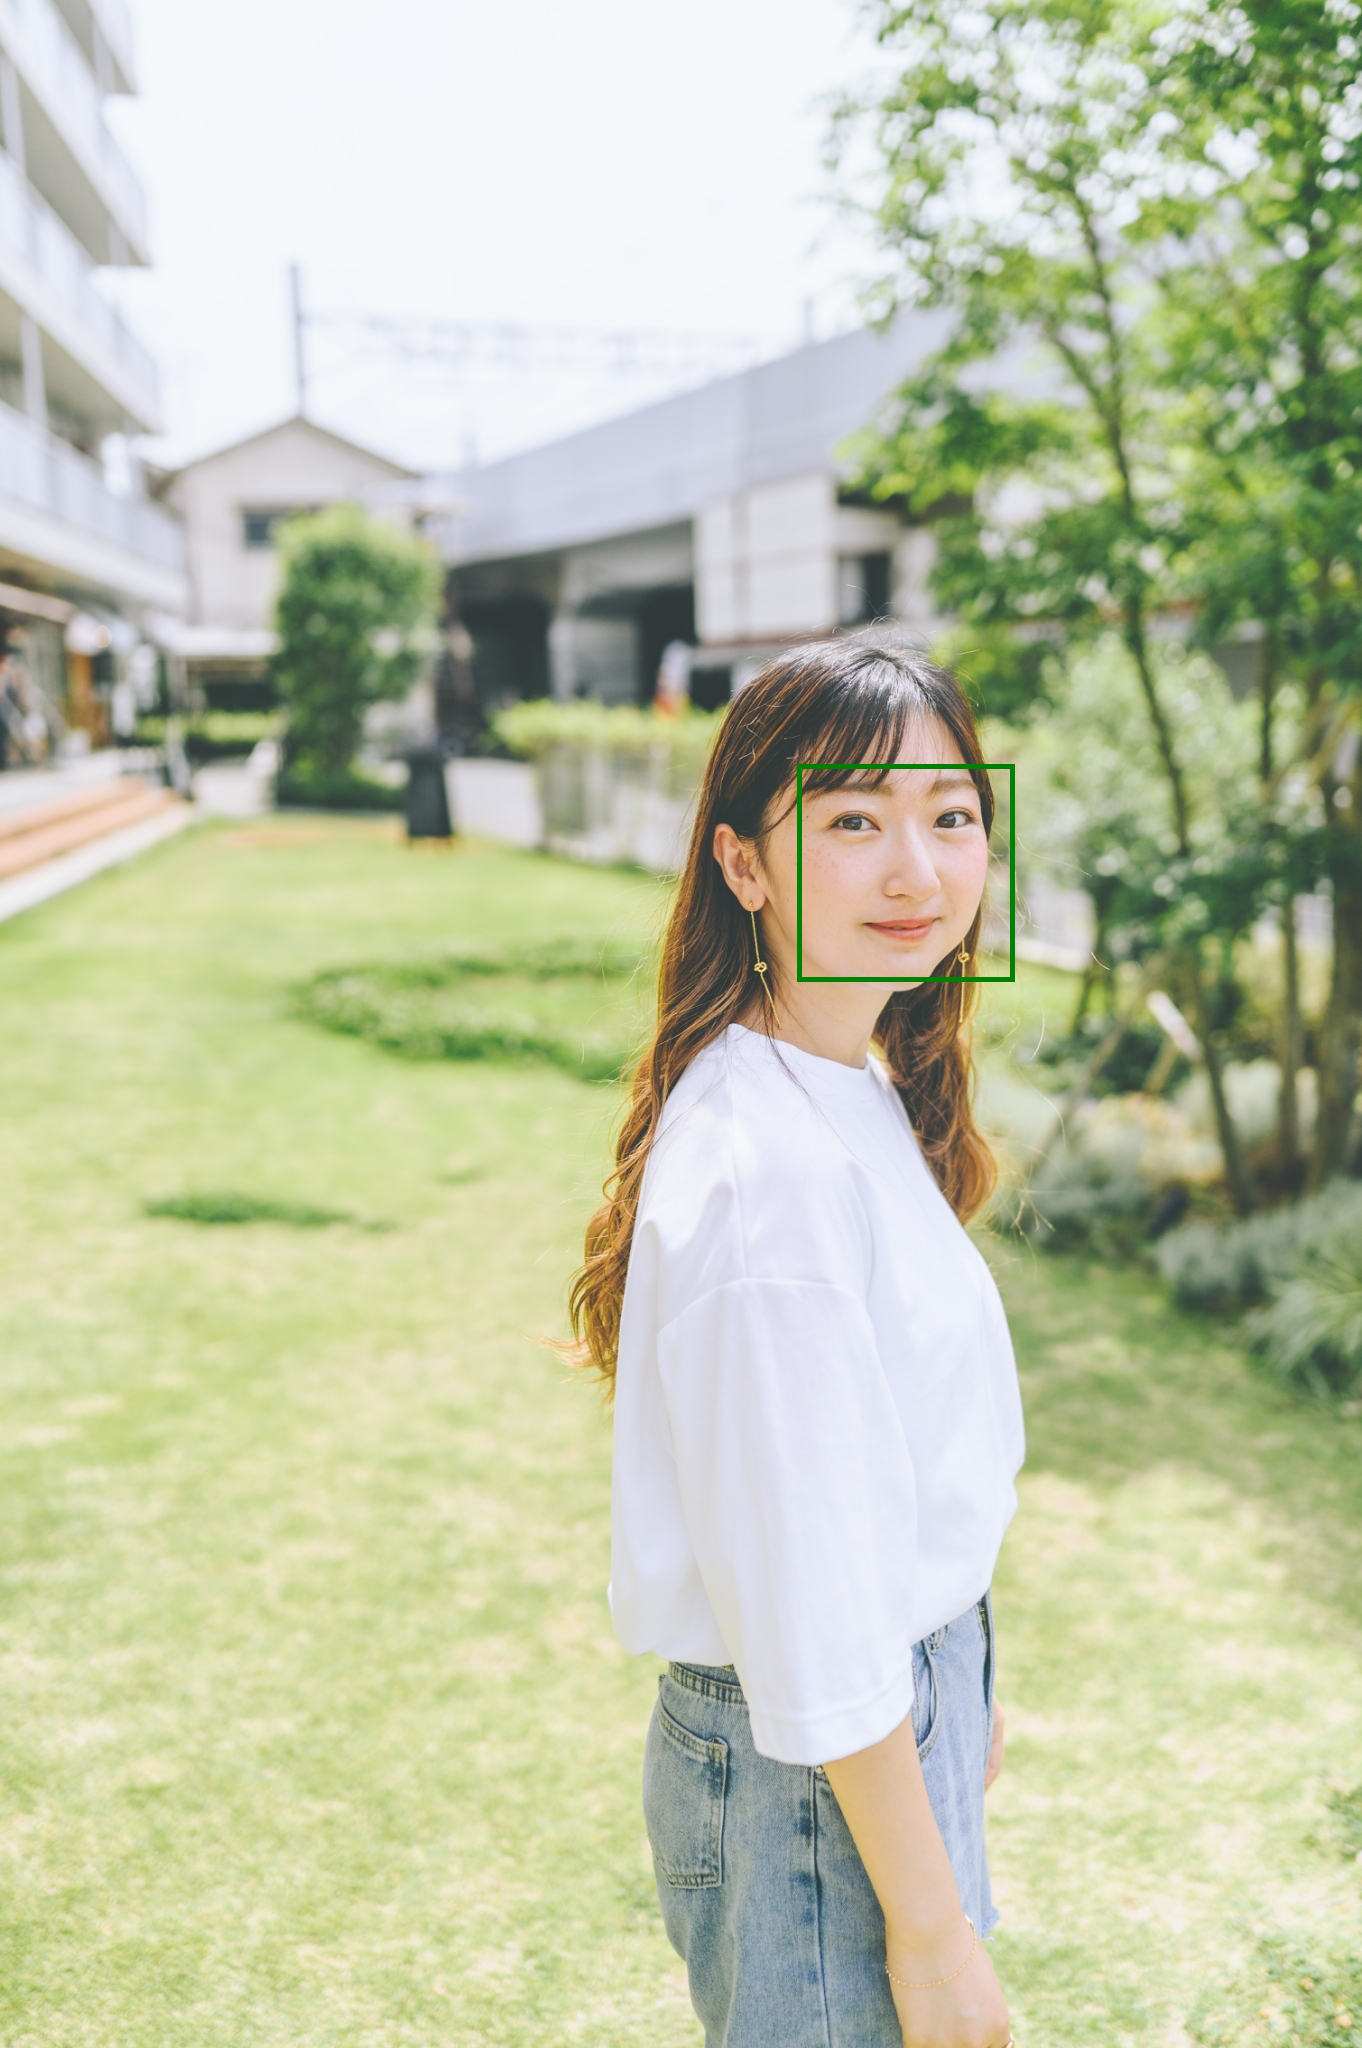

In [23]:
draw.rectangle([(rect['left'], rect['top']),(rect['left']+rect['width'],rect['top']+rect['height'])], fill=None, outline='green',width=5)
img

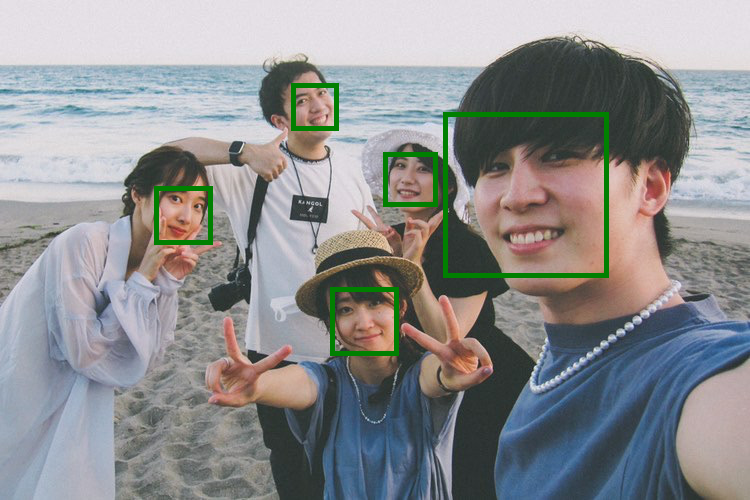

In [29]:
import requests
from PIL import Image
import json
from PIL import ImageDraw
import io


subscription_key = '8387f9c474574ec394896ce7dd891f45'
assert subscription_key

face_api_url= 'https://20210731tsukasa.cognitiveservices.azure.com/face/v1.0/detect'


img = Image.open('syu.jpg')
with io.BytesIO() as output:
    img.save(output,format="JPEG")
    bianry_img = output.getvalue()
    
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key':subscription_key
}

    
params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise' 
}
  
res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)
results = res.json()

for result in results:
    rect = result['faceRectangle']
    
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']),(rect['left']+rect['width'],rect['top']+rect['height'])], fill=None, outline='green',width=5)
img


In [30]:
import io

In [ ]:
with io.BytesIO() as output:
    img.save(output,format="JPEG")
    bianry_img = output.getvalue()